In [1]:
import pandas as pd
from functools import reduce
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as md

#import plotly.graph_objects as go
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities

# File imports
## Adjen.. Matrix processing

In [2]:
adj_mat = pd.read_csv('../Griffin_data/Adjacency_Matrix_Output_C4.csv')
adj_mat = adj_mat[['src', 'dst', 'date', 'cluster_src', 'neighbours', 'neighbours_cluster', 
                   'neighbours_!cluster', 'cluster_dst', 'twitter_query_src', 'twitter_query_dst']]

adj_mat_ETH2 = adj_mat.loc[(adj_mat['twitter_query_src'] == 'ETH2') | (adj_mat['twitter_query_dst'] == 'ETH2')]
adj_mat_SHIB = adj_mat.loc[(adj_mat['twitter_query_src'] == 'SHIB') | (adj_mat['twitter_query_dst'] == 'SHIB')]
adj_mat_SOL = adj_mat.loc[(adj_mat['twitter_query_src'] == 'SOL') | (adj_mat['twitter_query_dst'] == 'SOL')]
adj_mat_ETH = adj_mat.loc[(adj_mat['twitter_query_src'] == 'ETH') | (adj_mat['twitter_query_dst'] == 'ETH')]
adj_mat_LINK = adj_mat.loc[(adj_mat['twitter_query_src'] == 'LINK') | (adj_mat['twitter_query_dst'] == 'LINK')]
adj_mat_BTC = adj_mat.loc[(adj_mat['twitter_query_src'] == 'BTC') | (adj_mat['twitter_query_dst'] == 'BTC')]
adj_mat_DOGE = adj_mat.loc[(adj_mat['twitter_query_src'] == 'DOGE') | (adj_mat['twitter_query_dst'] == 'DOGE')]



#adj_mat = pd.read_csv('../Griffin_data/Adjacency_Matrix_Output_C4.csv', index_col='Unnamed: 0') #, index_col='Unnamed: 0'
#adj_mat = adj_mat[['src', 'dst', 'date', 'cluster_src', 'neighbours', 'neighbours_cluster', 
#                   'neighbours_!cluster', 'cluster_dst', 'twitter_query']]

#adj_mat_ETH2 = adj_mat.loc[adj_mat['twitter_query'] == 'ETH2']
#adj_mat_SHIB = adj_mat.loc[adj_mat['twitter_query'] == 'SHIB']
#adj_mat_SOL = adj_mat.loc[adj_mat['twitter_query'] == 'SOL']
#adj_mat_ETH = adj_mat.loc[adj_mat['twitter_query'] == 'ETH']
#adj_mat_LINK = adj_mat.loc[adj_mat['twitter_query'] == 'LINK']
#adj_mat_BTC = adj_mat.loc[adj_mat['twitter_query'] == 'BTC']
#adj_mat_DOGE = adj_mat.loc[adj_mat['twitter_query'] == 'DOGE']

## News dataframe processing

In [3]:
news_df = pd.read_excel('../GPT-3_Approach/output_data_sentiment.xlsx', index_col='Unnamed: 0').drop(columns=['Unnamed: 0.1','Unnamed: 0.1.1'])

news_df['Query'] = news_df['Query'].str.replace('bitcoin', 'BTC')
news_df['Query'] = news_df['Query'].str.replace('ethereum2', 'ETH2')
news_df['Query'] = news_df['Query'].str.replace('shibainucoin', 'SHIB')
news_df['Query'] = news_df['Query'].str.replace('solana', 'SOL')
news_df['Query'] = news_df['Query'].str.replace('ethereum', 'ETH')
news_df['Query'] = news_df['Query'].str.replace('Chainlink', 'LINK')
news_df['Query'] = news_df['Query'].str.replace('dogecoin', 'DOGE')

news_df_BTC = news_df.loc[news_df['Query'] == 'BTC']
news_df_ETH2 = news_df.loc[news_df['Query'] == 'ETH2']
news_df_SHIB = news_df.loc[news_df['Query'] == 'SHIB']
news_df_SOL = news_df.loc[news_df['Query'] == 'SOL']
news_df_ETH = news_df.loc[news_df['Query'] == 'ETH']
news_df_LINK = news_df.loc[news_df['Query'] == 'LINK']
news_df_DOGE = news_df.loc[news_df['Query'] == 'DOGE']

## Crypto data import

In [4]:
df_ta_BTC = pd.read_csv('ta_df/df_ta_BTC.csv')
df_ta_SHIB = pd.read_csv('ta_df/df_ta_SHIB.csv')
df_ta_SOL = pd.read_csv('ta_df/df_ta_SOL.csv')
df_ta_ETH = pd.read_csv('ta_df/df_ta_ETH.csv')
df_ta_LINK = pd.read_csv('ta_df/df_ta_LINK.csv')
df_ta_DOGE = pd.read_csv('ta_df/df_ta_DOGE.csv')
df_ta_SHIB = pd.read_csv('ta_df/df_ta_SHIB.csv')

# Define Model
## Functions

In [5]:
ng = adj_mat_ETH.loc[adj_mat['date'] == '2021-12-26']

In [6]:
ng

,src,dst,date,cluster_src,neighbours,neighbours_cluster,neighbours_!cluster,cluster_dst,twitter_query_src,twitter_query_dst
167140,kriptooffice,iaairdrop,2021-12-26,cluster_3,7,0,7,cluster_0,BTC,ETH
167157,kriptooffice,iaairdrop,2021-12-26,cluster_3,7,0,7,cluster_0,BTC,ETH
167168,luisricartoons,ljenguza924,2021-12-26,cluster_2,2,0,2,cluster_0,ETH,ETH
167173,lettersforwhat,wadashi,2021-12-26,cluster_0,1,0,1,cluster_2,ETH,ETH
167174,nprnft,ashokarorain,2021-12-26,cluster_0,1,0,1,cluster_2,SHIB,ETH
...,...,...,...,...,...,...,...,...,...,...
187601,thesmarmybum,riko32383974,2021-12-26,cluster_3,22,3,19,cluster_0,ETH,DOGE
187602,thesmarmybum,dogegirl11,2021-12-26,cluster_3,22,3,19,cluster_0,ETH,DOGE
187603,thesmarmybum,martinm99588412,2021-12-26,cluster_3,22,3,19,cluster_0,ETH,DOGE
187604,thesmarmybum,martial9anto,2021-12-26,cluster_3,22,3,19,cluster_0,ETH,DOGE


# Problem with neighbour calculation

In [54]:
G = nx.convert_matrix.from_pandas_edgelist(df=ng,source='src', target='dst', edge_attr='cluster_src')
pos = nx.spring_layout(G, k = 3/math.sqrt(len(ng)), iterations = 50)



nx.set_node_attributes(G, pd.Series(ng.cluster_src, index=ng.src).to_dict(), 'cluster_src')



gop = nx.to_pandas_adjacency(G)
#gop

#liste mit allen nodes: liste mit nodes die im selben cluster sind



#nsc = [G.number_of_edges(u=x, v=y) for x,y in G.nodes() if graph.nodes[x]['cluster_src'] == graph.nodes[y]['cluster_src']]

nsc = {}

for src in list(G.nodes()):
    
    #print(G[i])
    
    for dst in list(G.nodes()):
        
        if (G.nodes[src]['cluster_src'] == G.nodes[dst]['cluster_src']):
        
            test =[]
            #print('yes')
            nsc[src] = test.append(dst)
        
        #print(G.nodes(k)
              

nsc
        
        
    
    
    #if G.nodes(i) == G[i].get().get('cluster_src') 

#G['leerzeit'].get('alexan20011').get('cluster_src')




#nx.draw(G, pos)

#pd.Series(ng.cluster_src, index=ng.src)

#per node count edges that have the same edge attribute as node


{'leerzeit': None,
 'neptune_xrp': None,
 'terry_twatter': None,
 'ladtowsey': None,
 'alexan20011': None,
 'shibaxx1': None,
 'sftd_art': None,
 'kennedypattiso1': None,
 'moonboyp': None,
 'cryptoskyreach': None,
 'ethanon21793186': None,
 'theagentsmith_3': None,
 'timmill52024962': None,
 'lidofinance': None,
 'rstormsf': None,
 'me09158228': None,
 'githa_74': None,
 'developer_dao': None,
 'tadaspetra': None,
 'jayarsuaresz': None,
 'bitcoinduh': None,
 'idesire_btc': None,
 'fastpeterson': None,
 '10cryptoes': None,
 'xrp_ninja': None,
 'estammaddoyom': None,
 'chesh_be_ra': None,
 'lucaxrp': None}

# Connecting Components of Network to Largest Component

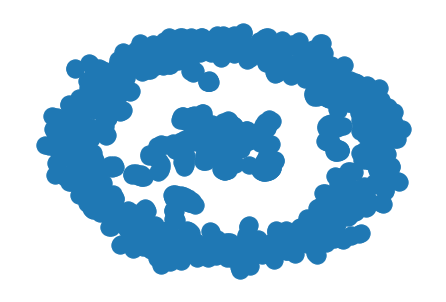

In [147]:
G = nx.convert_matrix.from_pandas_edgelist(df=ng,source='src', target='dst', edge_attr=True)

nx.draw(G)

In [155]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])
type(Gcc)

list

In [91]:
print(G)

Graph with 28 nodes and 32 edges


In [148]:
#ng = ng.rename(index={'src': 'ID'})
ng

#ng_complete = pd.merge(ng, test, how='outer', on='src')

,dst,date,cluster_src,neighbours,neighbours_cluster,neighbours_!cluster,cluster_dst,twitter_query_src,twitter_query_dst,src
src,,,,,,,,,,
kriptooffice,iaairdrop,2021-12-26,cluster_3,7,0,7,cluster_0,BTC,ETH,kriptooffice
kriptooffice,iaairdrop,2021-12-26,cluster_3,7,0,7,cluster_0,BTC,ETH,kriptooffice
luisricartoons,ljenguza924,2021-12-26,cluster_2,2,0,2,cluster_0,ETH,ETH,luisricartoons
lettersforwhat,wadashi,2021-12-26,cluster_0,1,0,1,cluster_2,ETH,ETH,lettersforwhat
nprnft,ashokarorain,2021-12-26,cluster_0,1,0,1,cluster_2,SHIB,ETH,nprnft
...,...,...,...,...,...,...,...,...,...,...
thesmarmybum,riko32383974,2021-12-26,cluster_3,22,3,19,cluster_0,ETH,DOGE,thesmarmybum
thesmarmybum,dogegirl11,2021-12-26,cluster_3,22,3,19,cluster_0,ETH,DOGE,thesmarmybum
thesmarmybum,martinm99588412,2021-12-26,cluster_3,22,3,19,cluster_0,ETH,DOGE,thesmarmybum


In [153]:
pd.Series(nx.connected_components(G)).index

RangeIndex(start=0, stop=303, step=1)

In [152]:
G.nodes()

NodeView(('kriptooffice', 'iaairdrop', 'luisricartoons', 'ljenguza924', 'lettersforwhat', 'wadashi', 'nprnft', 'ashokarorain', 'yuukimiso', 'asuma258', 'rasoulg1395', 'eliazimi4', 'sooniii00', 'anh123013', 'morpheuslabs_io', 'normanino9', 'serkanarikan06', 'vodratoken', 'airdropgator2', 'realyoyowbu', 'farukoztrx', 'zhangclzhangcl', 'levolef', 'wherelamboac', 'novel64273603', 'jamez_sarah', 'novadaofinance', 'baboskojne', 'kriptokalamar', 'secknakoz', 'mustafa10470841', 'uygar_etci', 'notorious1_eth', 'arcwind23', 'viruscityxx', 'jeff_eth', 'sachadrhy', 'jae_name', '_society01', 'aramaxpro', 'r4m1_b', 'icosi_eth', 'jaeecityxx', 'xzyfe', 'anunaki888', 'vinst_nft', 'toria_eth', 'nftddog', 'anthonyy1k', 'nickkapa4', 'mslindarose1', 'rwinovnft', 'ryousatoshi_', 'cvzmmveneoy4chq', 'soggyfrench_fry', 'lackofaname', 'jaembigwinn', 'kozmospro', 'ape_psycho', 'popol60487518', 'ape_kingdom_', 'blaqq_child', 'kurtfireman', 'okankeklikk', 'kushalsingh77', 'kursadbucak', '60ciftcier', 'oatsy_nft', 

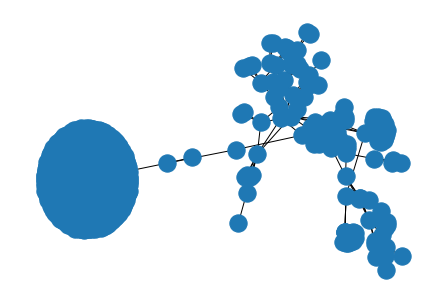

In [157]:
#creating subgraphs of graph

comp = {}


for i in list(pd.Series(nx.connected_components(G)).index):
    
    comp['G'+str(i)] = G.subgraph(Gcc[i])
    
for i in G.nodes():
    if i in comp.get('G0').nodes():
        #print('pass')
        pass
    else:
        #print('no')
        #pass
        G.add_edge(i, list(comp.get('G0').nodes)[0])
        

nx.k_edge_augmentation(G, k=1)

nx.draw(G)
        
#print(test)
#print(comp.get('G0'))
        
#list(comp.get('G0').nodes)[0]
    
#len(comp.get('G0').nodes())   
    
#if 'sftd_art' in comp.get('G0').nodes():
#    print('yes')
#else:
#    print('no')
    

# Detect Communities

In [330]:
from networkx.algorithms.community import k_clique_communities

In [331]:
list(nx.find_cliques(G))

[['mmcrypto', 'jae_name', 'aramaxpro'],
 ['mmcrypto', 'jae_name', '_society01'],
 ['mmcrypto', 'giantgoober', 'rsa_3dart'],
 ['mmcrypto', 'giantgoober', 'ds_art_'],
 ['mmcrypto', 'metaclubsociety', 'redo_to'],
 ['mmcrypto', 'phylinat', 'curseofdeadcat'],
 ['mmcrypto', 'samicho36204709', 'ryousatoshi_'],
 ['mmcrypto', 'samicho36204709', 'ryou_nft'],
 ['mmcrypto', 'samicho36204709', 'just_nftverse'],
 ['mmcrypto', 'xzyfe', 'jaeecityxx'],
 ['mmcrypto', 'bskpekermengen', 'borsaci4141'],
 ['mmcrypto', 'cmousef', 'lumiere_nini'],
 ['mmcrypto', 'look1the2world', '4hgvh5'],
 ['mmcrypto', 'gin_zho', 'aa870507'],
 ['mmcrypto', 'mfhan_w', 'titan_v16'],
 ['mmcrypto', 'aaronphillip19', 'hammertoe'],
 ['mmcrypto', 'yan7969', 'chibicacti'],
 ['mmcrypto', 'tendz14', '_introverse_'],
 ['mmcrypto', 'bard_nft', 'popol60487518'],
 ['mmcrypto', 'rishi07246149', 'holochainb'],
 ['mmcrypto', 'nfteams_', 'charliek_eth'],
 ['mmcrypto', 'roaringroccstar', 'arcwind23'],
 ['mmcrypto', 'roaringroccstar', 'guppy93a

In [122]:
print(G)

Graph with 28 nodes and 32 edges


In [160]:
c = list(k_clique_communities(G, 3))

In [161]:
c

[frozenset({'66mhz',
            '_society01',
            'aramaxpro',
            'bitpromotool',
            'boredmancrypto',
            'genericorp',
            'jae_name',
            'jimsedric',
            'mathgril',
            'mmcrypto',
            'nftstud03',
            'silentroombears',
            'sjb6991'}),
 frozenset({'devamotion',
            'ds_art_',
            'giantgoober',
            'jaggedsoft',
            'mmcrypto',
            'naramalee',
            'rsa_3dart'}),
 frozenset({'itiswhatitis365', 'metaclubsociety', 'mmcrypto', 'redo_to'}),
 frozenset({'curseofdeadcat', 'mmcrypto', 'phylinat'}),
 frozenset({'cvzmmveneoy4chq',
            'deleteinlate',
            'jerry37718561',
            'just_nftverse',
            'mmcrypto',
            'ntones2',
            'pol_nft',
            'ryou_nft',
            'ryousatoshi_',
            'samicho36204709'}),
 frozenset({'jaeecityxx', 'mmcrypto', 'xzyfe'}),
 frozenset({'borsaci4141', 'bskpeker

In [332]:
from networkx.algorithms.community import greedy_modularity_communities

In [334]:
communities = greedy_modularity_communities(G)

In [345]:
len(communities[12])

13

In [361]:

modularity_class = {}

#Loop through each community in the network
for community_number, community in enumerate(communities):
    #For each member of the community, add their community number and a distinct color
    for name in community: 
        modularity_class[name] = community_number

        
modularity_class

{'nftart_promoter': 0,
 'groprotocol': 0,
 'phylinat': 0,
 'fegtechnology': 0,
 'xzyfe': 0,
 'bskpekermengen': 0,
 'jimmysullivanbr': 0,
 'taniamo95355808': 0,
 'cmousef': 0,
 'narisuke_92': 0,
 'crypto_mehul': 0,
 'siagolab': 0,
 'f2nft': 0,
 'layerswap': 0,
 'toytoko': 0,
 'tradersreport': 0,
 'suckypie': 0,
 'nprnft': 0,
 'volkanhic': 0,
 'cryptohodlr2025': 0,
 'gin_zho': 0,
 'lnevols': 0,
 'mfhan_w': 0,
 'farukoztrx': 0,
 'p2pb2b': 0,
 'misterr59720754': 0,
 'tendz14': 0,
 'bard_nft': 0,
 'rishi07246149': 0,
 'themetroverse': 0,
 'ape_psycho': 0,
 'nfteams_': 0,
 'yungmorocc': 0,
 'oleg_lokhov': 0,
 '_introverse_': 0,
 'ashokarorain': 0,
 'raydalio': 0,
 'bzisnz': 0,
 'btcecho': 0,
 'creo_engine': 0,
 'naughtyone__': 0,
 'dora_eth': 0,
 'fenix_satou': 0,
 'sirrobartii1': 0,
 'defiburglar': 0,
 'onlycrypto9': 0,
 'cavvuoyj46mailc': 0,
 'nft_eth7': 0,
 'zhangclzhangcl': 0,
 'jasminesart': 0,
 'crypt_zon': 0,
 'pratamafsp1': 0,
 'mahan122175351': 0,
 'kirajones13x': 0,
 'sorarebot': 0

In [350]:
len([k for k,v in modularity_class.items() if v == 70])

3

In [352]:
nx.set_node_attributes(G, modularity_class, 'modularity_class')

In [354]:
G.nodes().get('kriptooffice').get('modularity_class')

17

# Recalculate Neighbors with Modularity Class

In [397]:
nsc_mc = {}

for node in G.nodes():
    #print(node)
    #print(G.nodes[node]['cluster_src'])
    #print(list(G.neighbors(node)))
    sc = []
    for neighbor in G.neighbors(node):
        if G.nodes[node]['modularity_class'] == G.nodes[neighbor]['modularity_class']:
            
            sc.append(neighbor)
            
            #print('yes')
        else:
            pass
            #print('no')
    
    #print(len(sc))
    nsc_mc[node] = len(sc)

nsc_mc


{'kriptooffice': 1,
 'iaairdrop': 5,
 'luisricartoons': 1,
 'ljenguza924': 2,
 'lettersforwhat': 2,
 'wadashi': 2,
 'nprnft': 2,
 'ashokarorain': 2,
 'yuukimiso': 2,
 'asuma258': 2,
 'rasoulg1395': 2,
 'eliazimi4': 14,
 'sooniii00': 20,
 'anh123013': 4,
 'morpheuslabs_io': 2,
 'normanino9': 1,
 'serkanarikan06': 2,
 'vodratoken': 2,
 'airdropgator2': 2,
 'realyoyowbu': 2,
 'farukoztrx': 2,
 'zhangclzhangcl': 2,
 'levolef': 1,
 'wherelamboac': 14,
 'novel64273603': 1,
 'jamez_sarah': 31,
 'novadaofinance': 2,
 'baboskojne': 2,
 'kriptokalamar': 3,
 'secknakoz': 1,
 'mustafa10470841': 1,
 'uygar_etci': 1,
 'notorious1_eth': 1,
 'arcwind23': 3,
 'viruscityxx': 2,
 'jeff_eth': 17,
 'sachadrhy': 17,
 'jae_name': 2,
 '_society01': 4,
 'aramaxpro': 4,
 'r4m1_b': 2,
 'icosi_eth': 2,
 'jaeecityxx': 2,
 'xzyfe': 2,
 'anunaki888': 3,
 'vinst_nft': 1,
 'toria_eth': 1,
 'nftddog': 1,
 'anthonyy1k': 5,
 'nickkapa4': 1,
 'mslindarose1': 1,
 'rwinovnft': 1,
 'ryousatoshi_': 6,
 'cvzmmveneoy4chq': 3,
 

In [398]:
nsc_mc = pd.DataFrame.from_dict(nsc_mc, orient = 'index')
nsc_mc = nsc_mc.rename(columns={0: 'nsc_mc'})


In [399]:
nodelist_mc = pd.merge(nt,nsc_mc,how='outer',on = nt.index)

In [400]:
nodelist_mc

,key_0,nt,nsc_mc
0,kriptooffice,2,1
1,iaairdrop,6,5
2,luisricartoons,2,1
3,ljenguza924,3,2
4,lettersforwhat,2,2
...,...,...,...
1300,brianlskinner,2,2
1301,groprotocol,2,2
1302,gtyudtelfqz50ph,2,2
1303,botcybersec,2,1


In [401]:
nodelist_mc = nodelist_mc.rename(columns={'key_0': 'node'})
nodelist_mc

,node,nt,nsc_mc
0,kriptooffice,2,1
1,iaairdrop,6,5
2,luisricartoons,2,1
3,ljenguza924,3,2
4,lettersforwhat,2,2
...,...,...,...
1300,brianlskinner,2,2
1301,groprotocol,2,2
1302,gtyudtelfqz50ph,2,2
1303,botcybersec,2,1


In [402]:
cl_mc = {}

for node in nodelist_mc['node']:
    
    #print(node)
    #print(G.nodes().get(node).get('cluster_src'))
    cl_mc[node] = G.nodes().get(node).get('modularity_class')
    
cl_mc

{'kriptooffice': 17,
 'iaairdrop': 17,
 'luisricartoons': 64,
 'ljenguza924': 64,
 'lettersforwhat': 0,
 'wadashi': 0,
 'nprnft': 0,
 'ashokarorain': 0,
 'yuukimiso': 0,
 'asuma258': 0,
 'rasoulg1395': 3,
 'eliazimi4': 3,
 'sooniii00': 3,
 'anh123013': 0,
 'morpheuslabs_io': 0,
 'normanino9': 15,
 'serkanarikan06': 15,
 'vodratoken': 0,
 'airdropgator2': 0,
 'realyoyowbu': 0,
 'farukoztrx': 0,
 'zhangclzhangcl': 0,
 'levolef': 5,
 'wherelamboac': 5,
 'novel64273603': 2,
 'jamez_sarah': 2,
 'novadaofinance': 0,
 'baboskojne': 0,
 'kriptokalamar': 45,
 'secknakoz': 45,
 'mustafa10470841': 45,
 'uygar_etci': 45,
 'notorious1_eth': 35,
 'arcwind23': 35,
 'viruscityxx': 1,
 'jeff_eth': 1,
 'sachadrhy': 1,
 'jae_name': 13,
 '_society01': 13,
 'aramaxpro': 13,
 'r4m1_b': 0,
 'icosi_eth': 0,
 'jaeecityxx': 0,
 'xzyfe': 0,
 'anunaki888': 46,
 'vinst_nft': 46,
 'toria_eth': 46,
 'nftddog': 46,
 'anthonyy1k': 22,
 'nickkapa4': 22,
 'mslindarose1': 22,
 'rwinovnft': 22,
 'ryousatoshi_': 14,
 'cvzm

In [403]:
cl_mc = pd.DataFrame.from_dict(cl_mc, orient='index')
cl_mc = cl_mc.rename(columns={0: 'cl_mc'})

In [404]:
cl_mc

,cl_mc
kriptooffice,17
iaairdrop,17
luisricartoons,64
ljenguza924,64
lettersforwhat,0
...,...
brianlskinner,0
groprotocol,0
gtyudtelfqz50ph,0
botcybersec,34


In [405]:
nodelist_mc = pd.merge(nodelist_mc,cl_mc,how='outer',on = nodelist_mc.index)

In [406]:
nodelist_mc

,key_0,node,nt,nsc_mc,cl_mc
0,0,kriptooffice,2,1,17
1,1,iaairdrop,6,5,17
2,2,luisricartoons,2,1,64
3,3,ljenguza924,3,2,64
4,4,lettersforwhat,2,2,0
...,...,...,...,...,...
1300,1300,brianlskinner,2,2,0
1301,1301,groprotocol,2,2,0
1302,1302,gtyudtelfqz50ph,2,2,0
1303,1303,botcybersec,2,1,34


In [407]:
for node in nodelist_mc['node']:
    nodelist_mc['cluster_strength'] = nodelist_mc['nsc_mc'] / nodelist_mc['nt'] 


In [408]:
nodelist_mc

,key_0,node,nt,nsc_mc,cl_mc,cluster_strength
0,0,kriptooffice,2,1,17,0.500000
1,1,iaairdrop,6,5,17,0.833333
2,2,luisricartoons,2,1,64,0.500000
3,3,ljenguza924,3,2,64,0.666667
4,4,lettersforwhat,2,2,0,1.000000
...,...,...,...,...,...,...
1300,1300,brianlskinner,2,2,0,1.000000
1301,1301,groprotocol,2,2,0,1.000000
1302,1302,gtyudtelfqz50ph,2,2,0,1.000000
1303,1303,botcybersec,2,1,34,0.500000


In [409]:
nodelist_mc.groupby(['cl_mc'], sort=False)['cluster_strength'].min()

cl_mc
17    0.833333
64    0.666667
0     1.000000
3     1.000000
15    0.750000
        ...   
60    0.750000
89    0.666667
92    0.666667
93    0.666667
94    0.666667
Name: cluster_strength, Length: 95, dtype: float64

In [412]:
nodelist_mc.groupby(['cl_mc'], sort=False)['cluster_strength'].max().describe()

count    95.000000
mean      0.766778
std       0.101067
min       0.666667
25%       0.666667
50%       0.750000
75%       0.833333
max       1.000000
Name: cluster_strength, dtype: float64

<AxesSubplot:>

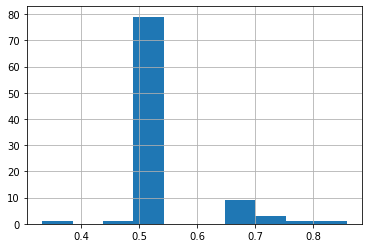

In [415]:
nodelist_mc.groupby(['cl_mc'], sort=False)['cluster_strength'].min().hist()

<AxesSubplot:>

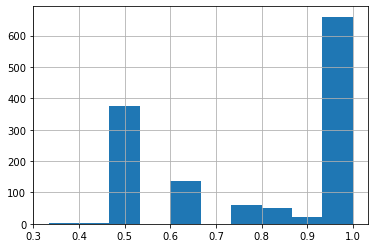

In [416]:
nodelist_mc['cluster_strength'].hist()

## Size of Cluster with Cluster Strength = 1 

# Cluster Visualization with bokeh

# Recalculate Neighbours with Griffin Cluster

In [174]:
nx.set_node_attributes(G, pd.Series(ng.cluster_src, index=ng.src).to_dict(), 'cluster_src')

In [175]:
G.nodes()['kriptooffice']

{'cluster_src': 'cluster_3'}

In [176]:
#G['kriptooffice']['cluster_src']

KeyError: 'cluster_src'

In [177]:
G.nodes['babydogecoin']['cluster_src']

'cluster_2'

In [189]:
#thesmarmybum

In [193]:
len(list(G.neighbors('thesmarmybum')))

15

In [202]:
nsc = {}

for node in G.nodes():
    #print(node)
    #print(G.nodes[node]['cluster_src'])
    #print(list(G.neighbors(node)))
    sc = []
    for neighbor in G.neighbors(node):
        if G.nodes[node]['cluster_src'] == G.nodes[neighbor]['cluster_src']:
            
            sc.append(neighbor)
            
            #print('yes')
        else:
            pass
            #print('no')
    
    #print(len(sc))
    nsc[node] = len(sc)

nsc


{'kriptooffice': 0,
 'iaairdrop': 0,
 'luisricartoons': 1,
 'ljenguza924': 0,
 'lettersforwhat': 0,
 'wadashi': 1,
 'nprnft': 0,
 'ashokarorain': 1,
 'yuukimiso': 1,
 'asuma258': 0,
 'rasoulg1395': 0,
 'eliazimi4': 2,
 'sooniii00': 4,
 'anh123013': 1,
 'morpheuslabs_io': 0,
 'normanino9': 0,
 'serkanarikan06': 1,
 'vodratoken': 1,
 'airdropgator2': 0,
 'realyoyowbu': 1,
 'farukoztrx': 0,
 'zhangclzhangcl': 0,
 'levolef': 0,
 'wherelamboac': 4,
 'novel64273603': 0,
 'jamez_sarah': 0,
 'novadaofinance': 1,
 'baboskojne': 0,
 'kriptokalamar': 1,
 'secknakoz': 0,
 'mustafa10470841': 0,
 'uygar_etci': 0,
 'notorious1_eth': 1,
 'arcwind23': 0,
 'viruscityxx': 0,
 'jeff_eth': 1,
 'sachadrhy': 1,
 'jae_name': 0,
 '_society01': 1,
 'aramaxpro': 1,
 'r4m1_b': 0,
 'icosi_eth': 0,
 'jaeecityxx': 0,
 'xzyfe': 1,
 'anunaki888': 0,
 'vinst_nft': 1,
 'toria_eth': 1,
 'nftddog': 1,
 'anthonyy1k': 1,
 'nickkapa4': 0,
 'mslindarose1': 0,
 'rwinovnft': 0,
 'ryousatoshi_': 1,
 'cvzmmveneoy4chq': 0,
 'soggy

In [203]:
nsc['kriptooffice']

0

In [208]:
list(G.neighbors('kriptooffice'))

['iaairdrop', 'mmcrypto']

In [209]:
ng.loc[ng['src'] == 'kriptooffice']

,dst,date,cluster_src,neighbours,neighbours_cluster,neighbours_!cluster,cluster_dst,twitter_query_src,twitter_query_dst,src
src,,,,,,,,,,
kriptooffice,iaairdrop,2021-12-26,cluster_3,7,0,7,cluster_0,BTC,ETH,kriptooffice
kriptooffice,iaairdrop,2021-12-26,cluster_3,7,0,7,cluster_0,BTC,ETH,kriptooffice


In [217]:
nsc

{'kriptooffice': 0,
 'iaairdrop': 0,
 'luisricartoons': 1,
 'ljenguza924': 0,
 'lettersforwhat': 0,
 'wadashi': 1,
 'nprnft': 0,
 'ashokarorain': 1,
 'yuukimiso': 1,
 'asuma258': 0,
 'rasoulg1395': 0,
 'eliazimi4': 2,
 'sooniii00': 4,
 'anh123013': 1,
 'morpheuslabs_io': 0,
 'normanino9': 0,
 'serkanarikan06': 1,
 'vodratoken': 1,
 'airdropgator2': 0,
 'realyoyowbu': 1,
 'farukoztrx': 0,
 'zhangclzhangcl': 0,
 'levolef': 0,
 'wherelamboac': 4,
 'novel64273603': 0,
 'jamez_sarah': 0,
 'novadaofinance': 1,
 'baboskojne': 0,
 'kriptokalamar': 1,
 'secknakoz': 0,
 'mustafa10470841': 0,
 'uygar_etci': 0,
 'notorious1_eth': 1,
 'arcwind23': 0,
 'viruscityxx': 0,
 'jeff_eth': 1,
 'sachadrhy': 1,
 'jae_name': 0,
 '_society01': 1,
 'aramaxpro': 1,
 'r4m1_b': 0,
 'icosi_eth': 0,
 'jaeecityxx': 0,
 'xzyfe': 1,
 'anunaki888': 0,
 'vinst_nft': 1,
 'toria_eth': 1,
 'nftddog': 1,
 'anthonyy1k': 1,
 'nickkapa4': 0,
 'mslindarose1': 0,
 'rwinovnft': 0,
 'ryousatoshi_': 1,
 'cvzmmveneoy4chq': 0,
 'soggy

In [251]:
len(G.edges())

2370

In [228]:
nsc = pd.DataFrame.from_dict(nsc, orient = 'index')

In [237]:
#ng.rename(index={'src': 'ID'})

nsc = nsc.rename(columns={0: 'nsc'})

In [240]:
nsc

,nsc
kriptooffice,0
iaairdrop,0
luisricartoons,1
ljenguza924,0
lettersforwhat,0
...,...
brianlskinner,0
groprotocol,0
gtyudtelfqz50ph,0
botcybersec,1


In [239]:
nsc.describe()

,nsc
count,1305.000000
mean,0.803065
std,9.221640
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,331.000000


In [254]:
G.degree('kriptooffice')

2

In [275]:
#nt

nt = {}

for node in G.degree():
    
    #print(node)
    nt[node[0]] = node[1]
    #nt[node] = G.degree(node)
    


nt

{'kriptooffice': 2,
 'iaairdrop': 6,
 'luisricartoons': 2,
 'ljenguza924': 3,
 'lettersforwhat': 2,
 'wadashi': 2,
 'nprnft': 2,
 'ashokarorain': 2,
 'yuukimiso': 2,
 'asuma258': 2,
 'rasoulg1395': 2,
 'eliazimi4': 14,
 'sooniii00': 21,
 'anh123013': 4,
 'morpheuslabs_io': 2,
 'normanino9': 2,
 'serkanarikan06': 3,
 'vodratoken': 2,
 'airdropgator2': 2,
 'realyoyowbu': 2,
 'farukoztrx': 2,
 'zhangclzhangcl': 2,
 'levolef': 2,
 'wherelamboac': 15,
 'novel64273603': 1,
 'jamez_sarah': 33,
 'novadaofinance': 2,
 'baboskojne': 2,
 'kriptokalamar': 4,
 'secknakoz': 2,
 'mustafa10470841': 2,
 'uygar_etci': 2,
 'notorious1_eth': 2,
 'arcwind23': 4,
 'viruscityxx': 3,
 'jeff_eth': 18,
 'sachadrhy': 18,
 'jae_name': 3,
 '_society01': 5,
 'aramaxpro': 5,
 'r4m1_b': 2,
 'icosi_eth': 2,
 'jaeecityxx': 2,
 'xzyfe': 2,
 'anunaki888': 4,
 'vinst_nft': 2,
 'toria_eth': 2,
 'nftddog': 2,
 'anthonyy1k': 6,
 'nickkapa4': 2,
 'mslindarose1': 2,
 'rwinovnft': 2,
 'ryousatoshi_': 7,
 'cvzmmveneoy4chq': 4,
 

In [276]:
nt = pd.DataFrame.from_dict(nt, orient='index')
nt = nt.rename(columns={0: 'nt'})

In [277]:
nt

,nt
kriptooffice,2
iaairdrop,6
luisricartoons,2
ljenguza924,3
lettersforwhat,2
...,...
brianlskinner,2
groprotocol,2
gtyudtelfqz50ph,2
botcybersec,2


In [283]:
False in nsc.index == nt.index

False

In [286]:
nodelist = pd.merge(nt,nsc,how='outer',on = nt.index)

In [288]:
nodelist = nodelist.rename(columns={'key_0': 'node'})
nodelist

,node,nt,nsc
0,kriptooffice,2,0
1,iaairdrop,6,0
2,luisricartoons,2,1
3,ljenguza924,3,0
4,lettersforwhat,2,0
...,...,...,...
1300,brianlskinner,2,0
1301,groprotocol,2,0
1302,gtyudtelfqz50ph,2,0
1303,botcybersec,2,1


In [309]:
cl = {}

for node in nodelist['node']:
    
    #print(node)
    #print(G.nodes().get(node).get('cluster_src'))
    cl[node] = G.nodes().get(node).get('cluster_src')
    
cl

{'kriptooffice': 'cluster_3',
 'iaairdrop': 'cluster_0',
 'luisricartoons': 'cluster_2',
 'ljenguza924': 'cluster_0',
 'lettersforwhat': 'cluster_0',
 'wadashi': 'cluster_2',
 'nprnft': 'cluster_0',
 'ashokarorain': 'cluster_2',
 'yuukimiso': 'cluster_2',
 'asuma258': 'cluster_0',
 'rasoulg1395': 'cluster_2',
 'eliazimi4': 'cluster_3',
 'sooniii00': 'cluster_3',
 'anh123013': 'cluster_2',
 'morpheuslabs_io': 'cluster_3',
 'normanino9': 'cluster_0',
 'serkanarikan06': 'cluster_2',
 'vodratoken': 'cluster_2',
 'airdropgator2': 'cluster_0',
 'realyoyowbu': 'cluster_2',
 'farukoztrx': 'cluster_0',
 'zhangclzhangcl': 'cluster_0',
 'levolef': 'cluster_3',
 'wherelamboac': 'cluster_2',
 'novel64273603': 'cluster_0',
 'jamez_sarah': 'cluster_2',
 'novadaofinance': 'cluster_2',
 'baboskojne': 'cluster_3',
 'kriptokalamar': 'cluster_2',
 'secknakoz': 'cluster_0',
 'mustafa10470841': 'cluster_0',
 'uygar_etci': 'cluster_0',
 'notorious1_eth': 'cluster_2',
 'arcwind23': 'cluster_0',
 'viruscityxx'

In [297]:
G.nodes().get('kriptooffice').get('cluster_src')

'cluster_3'

In [310]:
cl = pd.DataFrame.from_dict(cl, orient='index')
cl = cl.rename(columns={0: 'cl'})

In [311]:
cl

,cl
kriptooffice,cluster_3
iaairdrop,cluster_0
luisricartoons,cluster_2
ljenguza924,cluster_0
lettersforwhat,cluster_0
...,...
brianlskinner,cluster_0
groprotocol,cluster_3
gtyudtelfqz50ph,cluster_0
botcybersec,cluster_3


In [312]:
nodelist = pd.merge(nodelist,cl,how='outer',on = nodelist.index)

In [313]:
nodelist

,key_0,node,nt,nsc,cl
0,0,kriptooffice,2,0,cluster_3
1,1,iaairdrop,6,0,cluster_0
2,2,luisricartoons,2,1,cluster_2
3,3,ljenguza924,3,0,cluster_0
4,4,lettersforwhat,2,0,cluster_0
...,...,...,...,...,...
1300,1300,brianlskinner,2,0,cluster_0
1301,1301,groprotocol,2,0,cluster_3
1302,1302,gtyudtelfqz50ph,2,0,cluster_0
1303,1303,botcybersec,2,1,cluster_3


In [315]:
nodelist['node']

0          kriptooffice
1             iaairdrop
2        luisricartoons
3           ljenguza924
4        lettersforwhat
             ...       
1300      brianlskinner
1301        groprotocol
1302    gtyudtelfqz50ph
1303        botcybersec
1304     btczfuturecoin
Name: node, Length: 1305, dtype: object

In [316]:
for node in nodelist['node']:
    nodelist['cluster_strength'] = nodelist['nsc'] / nodelist['nt'] 



In [317]:
nodelist

,key_0,node,nt,nsc,cl,cluster_strength
0,0,kriptooffice,2,0,cluster_3,0.0
1,1,iaairdrop,6,0,cluster_0,0.0
2,2,luisricartoons,2,1,cluster_2,0.5
3,3,ljenguza924,3,0,cluster_0,0.0
4,4,lettersforwhat,2,0,cluster_0,0.0
...,...,...,...,...,...,...
1300,1300,brianlskinner,2,0,cluster_0,0.0
1301,1301,groprotocol,2,0,cluster_3,0.0
1302,1302,gtyudtelfqz50ph,2,0,cluster_0,0.0
1303,1303,botcybersec,2,1,cluster_3,0.5


In [319]:
G.nodes().get('iaairdrop')

{'cluster_src': 'cluster_0'}

In [320]:
for neighbors in G.neighbors('iaairdrop'):
    print(G.nodes().get(neighbors).get('cluster_src'))

cluster_3
cluster_2
cluster_2
cluster_2
cluster_3
cluster_2


In [323]:
nodelist['cluster_strength'].describe()

count    1305.000000
mean        0.189672
std         0.254640
min         0.000000
25%         0.000000
50%         0.000000
75%         0.500000
max         1.000000
Name: cluster_strength, dtype: float64

<AxesSubplot:>

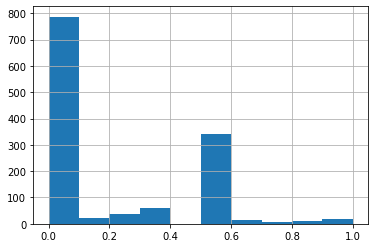

In [322]:
nodelist['cluster_strength'].hist()

In [329]:
nodelist.groupby(['cl'], sort=False)['cluster_strength'].max()

cl
cluster_3    1.000000
cluster_0    0.923077
cluster_2    1.000000
cluster_1    0.000000
Name: cluster_strength, dtype: float64

In [ ]:
def cluster_strength_with_pure_griffin_data():
    

# Cluster Strength Function with Pure Griffin Data

In [7]:
def cluster_strength(adj_mat): #
    #adj_mat = adj_mat.loc[adj_mat['twitter_query'] == query]

    adj_mat['cluster_strength'] = adj_mat['neighbours_cluster'] / adj_mat['neighbours']
    
    adj_mat['date'] = pd.to_datetime(adj_mat['date'])
    adj_mat_grouped = adj_mat.groupby([pd.Grouper(key='date', freq='D'),'cluster_src']).min()
    
    # cluster strength
    cs_day = adj_mat.groupby(['date'])['cluster_strength'].max()
    #cs_day = adj_mat.groupby(['date','cluster_src'])['cluster_strength'].max()
    cs_day = cs_day.to_frame()

    return cs_day

C:\Users\jgier\AppData\Local\Temp/ipykernel_1944/1048367674.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adj_mat['cluster_strength'] = adj_mat['neighbours_cluster'] / adj_mat['neighbours']
C:\Users\jgier\AppData\Local\Temp/ipykernel_1944/1048367674.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adj_mat['date'] = pd.to_datetime(adj_mat['date'])


array([[<AxesSubplot:title={'center':'cluster_strength'}>]], dtype=object)

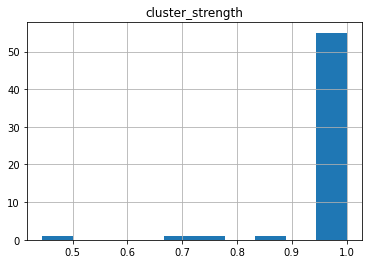

In [8]:
cluster_strength(adj_mat_ETH).hist()

# Cluster Strength Function with Reconnected Network

In [ ]:
def cs_wrn(adj_mat): #
    #adj_mat = adj_mat.loc[adj_mat['twitter_query'] == query]

    adj_mat['cluster_strength'] = adj_mat['neighbours_cluster'] / adj_mat['neighbours']
    
    adj_mat['date'] = pd.to_datetime(adj_mat['date'])
    adj_mat_grouped = adj_mat.groupby([pd.Grouper(key='date', freq='D'),'cluster_src']).min()
    
    # cluster strength
    cs_day = adj_mat.groupby(['date'])['cluster_strength'].max()
    #cs_day = adj_mat.groupby(['date','cluster_src'])['cluster_strength'].max()
    cs_day = cs_day.to_frame()

    return cs_day

# Cluster Strength Function with Modularity Class and Reconnected Network

In [5]:
#input: adj_math_coin
#output: cluster_strength per day

def reconnect_network(adj):
    
    cs_day = {}
    
    for day in adj['date'].unique(): 
        
        #print(day)
        #prepare data
        netg = adj.loc[adj['date'] == day]
        
        netg.set_index('src', inplace=True)
        netg.set_index(netg.index, drop=False)
        
        netg['src'] = netg.index 
        netg['index'] = netg.index
    
        G = nx.convert_matrix.from_pandas_edgelist(df=netg,source='src', target='dst', edge_attr=True)
    
        #check if there are multiple components
        Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    
        #reconnect network
        if len(Gcc) > 1:       
            comp = {}

            for i in list(pd.Series(nx.connected_components(G)).index):  
                comp['G'+str(i)] = G.subgraph(Gcc[i])
            for i in G.nodes():
                if i in comp.get('G0').nodes():
                    pass
                else:
                    G.add_edge(i, list(comp.get('G0').nodes)[0])
        
            nx.k_edge_augmentation(G, k=1)
        else:
            pass
    
        #nx.draw(G)
    
        #find communities
        communities = greedy_modularity_communities(G)

        #set community as node attribute
        modularity_class = {}
        for community_number, community in enumerate(communities):
            for name in community: 
                modularity_class[name] = community_number

        nx.set_node_attributes(G, modularity_class, 'modularity_class')

        #count edges per node between nodes with same community
        nsc_mc = {}
        for node in G.nodes():
            sc = []
            for neighbor in G.neighbors(node):
                if G.nodes[node]['modularity_class'] == G.nodes[neighbor]['modularity_class']:
                    sc.append(neighbor)
                else:
                    pass
            nsc_mc[node] = len(sc)
        nsc_mc = pd.DataFrame.from_dict(nsc_mc, orient = 'index')
        nsc_mc = nsc_mc.rename(columns={0: 'nsc_mc'})
    
        #count total edges per node
        nt = {}
        for node in G.degree():
            nt[node[0]] = node[1] 
        nt = pd.DataFrame.from_dict(nt, orient='index')
        nt = nt.rename(columns={0: 'nt'})
    
        #create nodelist
        nodelist_mc = pd.merge(nt,nsc_mc,how='outer',on = nt.index)
        nodelist_mc = nodelist_mc.rename(columns={'key_0': 'node'})

        #add community affiliation per node to nodelist
        cl_mc = {}
        for node in nodelist_mc['node']:
            cl_mc[node] = G.nodes().get(node).get('modularity_class')
        cl_mc = pd.DataFrame.from_dict(cl_mc, orient='index')
        cl_mc = cl_mc.rename(columns={0: 'cl_mc'})
        nodelist_mc = pd.merge(nodelist_mc,cl_mc,how='outer',on = nodelist_mc.index)

        #calculate cluster strength
        for node in nodelist_mc['node']:
            nodelist_mc['cluster_strength'] = nodelist_mc['nsc_mc'] / nodelist_mc['nt'] 
    
        #find lowest cluster strength per individual cluster and return the maximal cluster strength off all clusters
        max_cs_day = nodelist_mc.groupby(['cl_mc'], sort=False)['cluster_strength'].min().max()
        
        cs_day[day] = max_cs_day
        
    cs_day = pd.DataFrame.from_dict(cs_day, orient='index')
    cs_day = cs_day.rename(columns={0: 'cluster_strength'})
        
    return(cs_day)


In [8]:
reconnect_network(adj_mat_ETH)


C:\Users\jgier\AppData\Local\Temp/ipykernel_6584/1714648910.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netg['src'] = netg.index
C:\Users\jgier\AppData\Local\Temp/ipykernel_6584/1714648910.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netg['index'] = netg.index


,cluster_strength
2021-10-24,0.629630
2021-10-25,0.521739
2021-10-26,0.500000
2021-10-27,0.666667
2021-10-28,0.909091
2021-10-29,0.666667
2021-10-30,0.750000
2021-10-31,0.750000
2021-11-01,0.500000
2021-11-02,0.500000


# Cluster Visualization with Bokeh

In [9]:
import colorcet as cc

In [14]:
import bokeh

In [117]:
def network_plots(adj, date, reconnect, cluster):
    import colorcet as cc
    import bokeh
    from bokeh.io import output_notebook, show, save
    from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
    from bokeh.plotting import figure
    from bokeh.plotting import from_networkx
    from networkx.algorithms import community
    from networkx.algorithms.community import greedy_modularity_communities

    ng = adj.loc[adj['date'] == date]
    
    
    G = nx.convert_matrix.from_pandas_edgelist(df=adj.loc[adj['date'] == date],source='src', target='dst', edge_attr=True)
    
    

    if reconnect == True:
        Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    
        #reconnect network
        if len(Gcc) > 1:       
            comp = {}

            for i in list(pd.Series(nx.connected_components(G)).index):  
                comp['G'+str(i)] = G.subgraph(Gcc[i])
            for i in G.nodes():
                if i in comp.get('G0').nodes():
                    pass
                else:
                    G.add_edge(i, list(comp.get('G0').nodes)[0])
                
            nx.k_edge_augmentation(G, k=2)
        else:
            pass
        
    else:
        pass
    
        
        
    if cluster == 'griffin':
       # Create empty dictionaries
        modularity_class = {}
        modularity_color = {}
        #Loop through each community in the network
        for community_number, community in enumerate(ng['cluster_src'].unique()):
            #print(community)
    
            #For each member of the community, add their community number and a distinct color
            for name in ng[['src', 'cluster_src']].loc[test['cluster_src'] == community]['src'].unique(): 
                #print(name)
                modularity_class[name] = community_number
                modularity_color[name] = Spectral8[community_number] 
                
        nx.set_node_attributes(G, modularity_class, 'modularity_class')
        nx.set_node_attributes(G, modularity_color, 'modularity_color')
    
    else:
        communities = community.greedy_modularity_communities(G)
        # Create empty dictionaries
        modularity_class = {}
        modularity_color = {}
        #Loop through each community in the network
        for community_number, community in enumerate(communities):
            #For each member of the community, add their community number and a distinct color
            for name in community: 
                modularity_class[name] = community_number
                #modularity_color[name] = cc.b_glasbey_bw[community_number]
                #diverging_palette(cc.b_glasbey_bw, cc.b_glasbey, len(communities))
                #cc.b_glasbey_bw[community_number]
                #cc.glasbey_bw
                #bokeh.linear_palette(Turbo256, len(communities))
                #bokeh.palettes.Turbo256[community_number]
                #bokeh.palettes.linear_palette(bokeh.palettes.Turbo256, len(communities))
        nx.set_node_attributes(G, modularity_class, 'modularity_class')
        nx.set_node_attributes(G, modularity_color, 'modularity_color')
        
        
    #Choose attributes from G network to size and color by — setting manual size (e.g. 10) or color (e.g. 'skyblue') also allowed
    #size_by_this_attribute = 'adjusted_node_size'
    color_by_this_attribute = 'modularity_color'
    #Pick a color palette — Blues8, Reds8, Purples8, Oranges8, Viridis8
    color_palette = cc.b_glasbey_bw#bokeh.palettes.Turbo256#cc.glasbey_bw #Blues8
    #Choose a title!
    title = 'Twitter Network on Day: ' + str(date)

    #Establish which categories will appear when hovering over each node
    HOVER_TOOLTIPS = [
           ("Twitter User ID", "@index"),
            ("Degree", "@degree"),
             ("Modularity Class", "@modularity_class"),
            ("Modularity Color", "$color[swatch]:modularity_color"),
    ]

    #Create a plot — set dimensions, toolbar, and title
    plot = figure(tooltips = HOVER_TOOLTIPS,
                  tools="pan,wheel_zoom,save,reset, tap", active_scroll='wheel_zoom',
                x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title)

    #Create a network graph object
    # https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
    network_graph = from_networkx(G, nx.spring_layout, scale=10, center=(0, 0))

    #Set node sizes and colors according to node degree (color as category from attribute)
    network_graph.node_renderer.glyph = Circle(fill_color=color_by_this_attribute) #size=size_by_this_attribute, 

    #Set edge opacity and width
    network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)

    plot.renderers.append(network_graph)

    show(plot)
    
    #return(len(communities))

    #save(plot, filename=f"{title}.html")
                
    
                
    
        
    

In [118]:
network_plots(adj_mat_ETH, '2021-12-05', reconnect = False, cluster = 'modularity')

394

## with pure griffin data

In [59]:
G = nx.convert_matrix.from_pandas_edgelist(df=ng,source='src', target='dst', edge_attr=True)


NameError: name 'ng' is not defined

In [178]:
import bokeh
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
from bokeh.plotting import from_networkx
from networkx.algorithms import community

## with reconnecting

In [140]:
#check if there are multiple components

Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    
#reconnect network
if len(Gcc) > 1:       
    comp = {}

    for i in list(pd.Series(nx.connected_components(G)).index):  
        comp['G'+str(i)] = G.subgraph(Gcc[i])
    for i in G.nodes():
        if i in comp.get('G0').nodes():
            pass
        else:
            G.add_edge(i, list(comp.get('G0').nodes)[0])
        
    nx.k_edge_augmentation(G, k=1)
else:
    pass
    

## without reconnecting

In [100]:
degrees = dict(nx.degree(G))
nx.set_node_attributes(G, name='degree', values=degrees)

In [101]:
number_to_adjust_by = 5
adjusted_node_size = dict([(node, degree+number_to_adjust_by) for node, degree in nx.degree(G)])
nx.set_node_attributes(G, name='adjusted_node_size', values=adjusted_node_size)

## griffin cluster

In [102]:
# Create empty dictionaries
modularity_class = {}
modularity_color = {}
#Loop through each community in the network
for community_number, community in enumerate(ng['cluster_src'].unique()):
    print(community)
    
    #For each member of the community, add their community number and a distinct color
    for name in ng[['src', 'cluster_src']].loc[test['cluster_src'] == community]['src'].unique(): 
        #print(name)
        modularity_class[name] = community_number
        modularity_color[name] = Spectral8[community_number]

cluster_3
cluster_2
cluster_0
cluster_1


In [103]:
# Add modularity class and color as attributes from the network above
nx.set_node_attributes(G, modularity_class, 'modularity_class')
nx.set_node_attributes(G, modularity_color, 'modularity_color')

## modularity maximization

In [164]:
from networkx.algorithms.community import greedy_modularity_communities

In [166]:
communities = community.greedy_modularity_communities(G)

In [167]:
# Create empty dictionaries
modularity_class = {}
modularity_color = {}
#Loop through each community in the network
for community_number, community in enumerate(communities):
    #For each member of the community, add their community number and a distinct color
    for name in community: 
        modularity_class[name] = community_number
        modularity_color[name] = bokeh.palettes.Turbo256[community_number]

In [168]:
nx.set_node_attributes(G, modularity_class, 'modularity_class')
nx.set_node_attributes(G, modularity_color, 'modularity_color')

In [169]:
#Choose attributes from G network to size and color by — setting manual size (e.g. 10) or color (e.g. 'skyblue') also allowed
#size_by_this_attribute = 'adjusted_node_size'
color_by_this_attribute = 'modularity_color'
#Pick a color palette — Blues8, Reds8, Purples8, Oranges8, Viridis8
color_palette = Blues8
#Choose a title!
title = 'Twitter Network on Day: X'

#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [
       ("Twitter User ID", "@index"),
        ("Degree", "@degree"),
         ("Modularity Class", "@modularity_class"),
        ("Modularity Color", "$color[swatch]:modularity_color"),
]

#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset, tap", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title)

#Create a network graph object
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
network_graph = from_networkx(G, nx.spring_layout, scale=10, center=(0, 0))

#Set node sizes and colors according to node degree (color as category from attribute)
network_graph.node_renderer.glyph = Circle(fill_color=color_by_this_attribute) #size=size_by_this_attribute, 

#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)

plot.renderers.append(network_graph)

show(plot)
#save(plot, filename=f"{title}.html")

In [25]:
#Choose a title!
title = 'Twitter Communication Network on day X'

#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [("Twitter User", "@index")]

#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title)

#Create a network graph object with spring layout
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
network_graph = from_networkx(G, nx.spring_layout, scale=10, center=(0, 0))

#Set node size and color
network_graph.node_renderer.glyph = Circle(size=15, fill_color='skyblue')

#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)

#Add network graph to the plot
plot.renderers.append(network_graph)

show(plot)
#save(plot, filename=f"{title}.html")

In [20]:
output_notebook()

Loading BokehJS ...

## with own calculations

In [21]:
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
from bokeh.plotting import from_networkx
from bokeh.palettes import Blues8, Reds8, Purples8, Oranges8, Viridis8, Spectral8
from bokeh.transform import linear_cmap

In [ ]:
degrees = dict(networkx.degree(G))
networkx.set_node_attributes(G, name='degree', values=degrees)

In [ ]:
number_to_adjust_by = 5
adjusted_node_size = dict([(node, degree+number_to_adjust_by) for node, degree in networkx.degree(G)])
networkx.set_node_attributes(G, name='adjusted_node_size', values=adjusted_node_size)

In [ ]:
communities = community.greedy_modularity_communities(G)

## 3D Network Visualization with Plotly

In [43]:
import plotly.graph_objects as go
%matplotlib inline

In [57]:
G = nx.convert_matrix.from_pandas_edgelist(df=adj_mat_ETH.loc[adj_mat_ETH['date'] == '2021-12-21'],source='src', target='dst', edge_attr=True)
#check if there are multiple components

Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    
#reconnect network
if len(Gcc) > 1:       
    comp = {}

    for i in list(pd.Series(nx.connected_components(G)).index):  
        comp['G'+str(i)] = G.subgraph(Gcc[i])
    for i in G.nodes():
        if i in comp.get('G0').nodes():
            pass
        else:
            G.add_edge(i, list(comp.get('G0').nodes)[0])
        
    nx.k_edge_augmentation(G, k=1)
else:
    pass
    

In [58]:
netg_3D = nx.spring_layout(G,k = 4/math.sqrt(len(G.nodes())), dim=3, seed=18)

x_nodes = [netg_3D[i][0] for i in G.nodes()]# x-coordinates of nodes
y_nodes = [netg_3D[i][1] for i in G.nodes()]# y-coordinates
z_nodes = [netg_3D[i][2] for i in G.nodes()]# z-coordinates


edge_list = G.edges()

x_edges=[]
y_edges=[]
z_edges=[]

#need to fill these with all of the coordiates
for edge in edge_list:
    #format: [beginning,ending,None]
    x_coords = [netg_3D[edge[0]][0],netg_3D[edge[1]][0],None]
    x_edges += x_coords

    y_coords = [netg_3D[edge[0]][1],netg_3D[edge[1]][1],None]
    y_edges += y_coords

    z_coords = [netg_3D[edge[0]][2],netg_3D[edge[1]][2],None]
    z_edges += z_coords
    
#create a trace for the edges
trace_edges = go.Scatter3d(x=x_edges,
                        y=y_edges,
                        z=z_edges,
                        mode='lines',
                        line=dict(color='black', width=2),
                        hoverinfo='none')

#create a trace for the nodes
trace_nodes = go.Scatter3d(x=x_nodes,
                         y=y_nodes,
                        z=z_nodes,
                        mode='markers',
                        marker=dict(symbol='circle',
                                    size=10,
                                    line=dict(color='black', width=0.5)),
                        text=[],
                        hoverinfo='text')


                                    #color=community_label, #color the nodes according to their community
                                    #colorscale=['lightgreen','magenta'], #either green or mageneta
        #club_labels
        
        
#we need to set the axis for the plot 
axis = dict(showbackground=False,
            showline=False,
            zeroline=False,
            showgrid=False,
            showticklabels=False,
            title='')


#also need to create the layout for our plot
layout = go.Layout(title="Twitter Network on day X",
                width=650,
                height=625,
                showlegend=False,
                scene=dict(xaxis=dict(axis),
                        yaxis=dict(axis),
                        zaxis=dict(axis),
                        ),
                margin=dict(t=100),
                hovermode='closest')

#Include the traces we want to plot and create a figure
data = [trace_edges, trace_nodes]
fig = go.Figure(data=data, layout=layout)

fig.show()

# Functions

In [694]:
def aggregate_news(news_df):
    
    news_df = news_df.groupby('date').agg('sentiment_bin').mean()
    news_df = news_df.to_frame()
    
    return news_df
    

In [731]:
def merge_dataframe(df_ta, news_df, cs_day):
    df_ta = df_ta.rename(columns={'Date':'date'})
    


    df_ta['date'] = pd.to_datetime(df_ta['date'])
    #news_df['date'] = pd.to_datetime(news_df.index)
    #news_df = news_df.reset_index()
    ##cs_day = cs_day.reset_index()
    cs_day['date'] = pd.to_datetime(cs_day.index)
    
    merge_1 = df_ta.merge(cs_day, on='date')
    merge_2 = merge_1.merge(news_df, on='date')
    #merge_2
    
    merge_2.set_index('date', inplace=True)
    merge_2 = merge_2['2021-11-05':'2021-12-26']

    merged_cols = ['Close' ,'calculated_average', 'sentiment_bin', 'cluster_strength']
    df_final = merge_2[merged_cols]

    return df_final

In [514]:
def merge_dataframe_old(df_ta, news_df, cs_day):
    df_ta = df_ta.rename(columns={'Date':'date'})


    df_ta['date'] = pd.to_datetime(df_ta['date'])
    news_df['date'] = pd.to_datetime(news_df['date'])
    cs_day = cs_day.reset_index()
    cs_day['date'] = pd.to_datetime(cs_day['date'])
    
    merge_1 = df_ta.merge(cs_day, on='date')
    merge_2 = merge_1.merge(news_df, on='date')
    merge_2
    
    merge_2.set_index('date', inplace=True)
    merge_2 = merge_2['2021-11-05':'2021-12-26']

    merged_cols = ['Close' ,'calculated_average', 'sentiment_bin', 'cluster_strength']
    df_final = merge_2[merged_cols]

    return df_final

In [541]:
def calculate_model(df_final):
    df = df_final.reset_index().copy()

    df = df[df.sentiment_bin != 'void']
    df = df[df.cluster_strength != 'void']

    df['calculated_average'] = pd.to_numeric(df['calculated_average'])
    df['sentiment_bin'] = pd.to_numeric(df['sentiment_bin'])
    df['cluster_strength'] = pd.to_numeric(df['cluster_strength'])

    # sum of scores
    df['x'] = df['sentiment_bin'] + df['calculated_average']

    # payoffs
    df['a'] = 0

    for index, row in df.iterrows():
        df.loc[index, 'a'] = 1 / (1 + math.exp( -(df.loc[index, 'x'])))

    df['b'] = 1 - df['a']

    # threshold
    df['q'] = df['b'] / (df['a'] + df['b'])

    df['1-q'] = 1 - df['q']

    df_result = df[['date', 'a', 'cluster_strength', 'Close']].set_index('date')
    
    return df_result

In [542]:
def plot_figure(df_result, query):
    X = df_result.index.values
    y_cluster_strength = df_result['cluster_strength']
    y_a = df_result['a']
    y_close = df_result['Close']
    
    fig, ax = plt.subplots(figsize=(14, 6))
    fig.subplots_adjust(right=0.75)

    twin2 = ax.twinx()

    p1, = ax.plot(X, y_cluster_strength, label = "Cluster Strength", linewidth=1.0, color="blue")
    p2, = ax.plot(X, y_a, label = "a", linewidth=1.0, color="red")
    p3, = twin2.plot(X, y_close, '--',label = "Currency close (USD)", linewidth=0.75, color="green")


    ax.set_xlabel("Date")
    twin2.set_ylabel("Currency Close (USD)")

    ax.yaxis.label.set_color(p1.get_color())
    twin2.yaxis.label.set_color(p3.get_color())

    tkw = dict(size=4, width=1.5)
    twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
    ax.tick_params(axis='x', **tkw)

    ax.legend(handles=[p1, p2, p3])
    ax.set_title(query)
    plt.savefig('figures/'+query+'.png')
    plt.show()

## Whole Model function

In [733]:
def model(adj_mat, df_ta, news_df, query):
    cs_day = reconnect_network(adj_mat)
    #cs_day = cluster_strength(adj_mat, query)
    aggregate_news(news_df)
    df_final = merge_dataframe(df_ta, news_df, cs_day)
    df_result = calculate_model(df_final)
    plot_figure(df_result, query)
    
    return df_result

In [735]:
def model_output_as_csv(adj_mat, df_ta, news_df, query):
    cs_day = reconnect_network(adj_mat)
    aggregate_news(news_df)
    df_final = merge_dataframe(df_ta, news_df, cs_day)
    df_result = calculate_model(df_final)
    
    return df_result


In [738]:
#model_output_as_csv(adj_mat_ETH, df_ta_ETH, news_df_ETH, 'ETH').to_csv('../Model/Model_Output_ETH.csv')

C:\Users\jgier\AppData\Local\Temp/ipykernel_17380/2132487105.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netg['src'] = netg.index
C:\Users\jgier\AppData\Local\Temp/ipykernel_17380/2132487105.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netg['index'] = netg.index


In [739]:
#model_output_as_csv(adj_mat_BTC, df_ta_BTC, news_df_BTC, 'BTC').to_csv('../Model/Model_Output_BTC.csv')

C:\Users\jgier\AppData\Local\Temp/ipykernel_17380/2132487105.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netg['src'] = netg.index
C:\Users\jgier\AppData\Local\Temp/ipykernel_17380/2132487105.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netg['index'] = netg.index


In [740]:
#model_output_as_csv(adj_mat_SOL, df_ta_SOL, news_df_SOL, 'SOL').to_csv('../Model/Model_Output_SOL.csv')

C:\Users\jgier\AppData\Local\Temp/ipykernel_17380/2132487105.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netg['src'] = netg.index
C:\Users\jgier\AppData\Local\Temp/ipykernel_17380/2132487105.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netg['index'] = netg.index


In [741]:
#model_output_as_csv(adj_mat_LINK, df_ta_LINK, news_df_LINK, 'LINK').to_csv('../Model/Model_Output_LINK.csv')

C:\Users\jgier\AppData\Local\Temp/ipykernel_17380/2132487105.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netg['src'] = netg.index
C:\Users\jgier\AppData\Local\Temp/ipykernel_17380/2132487105.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netg['index'] = netg.index


In [742]:
#model_output_as_csv(adj_mat_SHIB, df_ta_SHIB, news_df_SHIB, 'SHIB').to_csv('../Model/Model_Output_SHIB.csv')

C:\Users\jgier\AppData\Local\Temp/ipykernel_17380/2132487105.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netg['src'] = netg.index
C:\Users\jgier\AppData\Local\Temp/ipykernel_17380/2132487105.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netg['index'] = netg.index


In [743]:
#model_output_as_csv(adj_mat_DOGE, df_ta_DOGE, news_df_DOGE, 'DOGE').to_csv('../Model/Model_Output_DOGE.csv')

C:\Users\jgier\AppData\Local\Temp/ipykernel_17380/2132487105.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netg['src'] = netg.index
C:\Users\jgier\AppData\Local\Temp/ipykernel_17380/2132487105.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netg['index'] = netg.index


# Loop

C:\Users\jgier\AppData\Local\Temp/ipykernel_17380/2132487105.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netg['src'] = netg.index
C:\Users\jgier\AppData\Local\Temp/ipykernel_17380/2132487105.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netg['index'] = netg.index
C:\Users\jgier\AppData\Local\Temp/ipykernel_17380/2132487105.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

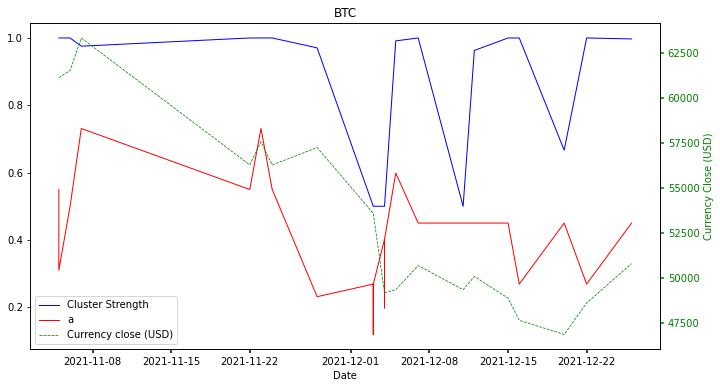

In [692]:
model_BTC = model(adj_mat=adj_mat_BTC, df_ta=df_ta_BTC, news_df=news_df_BTC, query='BTC')

C:\Users\jgier\AppData\Local\Temp/ipykernel_17380/2132487105.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netg['src'] = netg.index
C:\Users\jgier\AppData\Local\Temp/ipykernel_17380/2132487105.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netg['index'] = netg.index


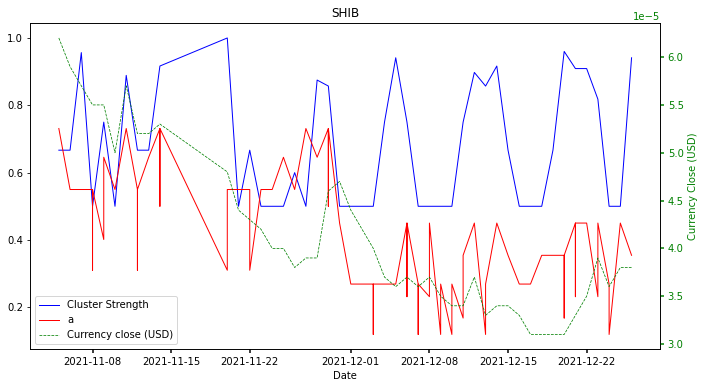

In [734]:
model_SHIB = model(adj_mat=adj_mat_SHIB, df_ta=df_ta_SHIB, news_df=news_df_SHIB, query='SHIB')

C:\Users\jgier\AppData\Local\Temp/ipykernel_17380/2132487105.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netg['src'] = netg.index
C:\Users\jgier\AppData\Local\Temp/ipykernel_17380/2132487105.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netg['index'] = netg.index
C:\Users\jgier\AppData\Local\Temp/ipykernel_17380/3407296845.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

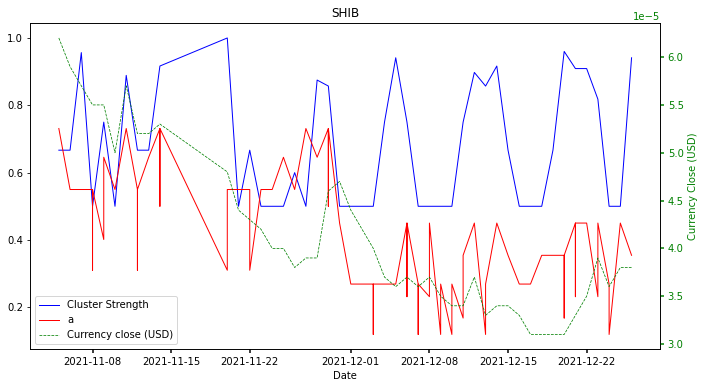

In [546]:
model_SHIB = model(adj_mat=adj_mat_SHIB, df_ta=df_ta_SHIB, news_df=news_df_SHIB, query='SHIB')

C:\Users\jgier\AppData\Local\Temp/ipykernel_17380/2132487105.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netg['src'] = netg.index
C:\Users\jgier\AppData\Local\Temp/ipykernel_17380/2132487105.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netg['index'] = netg.index
C:\Users\jgier\AppData\Local\Temp/ipykernel_17380/3407296845.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

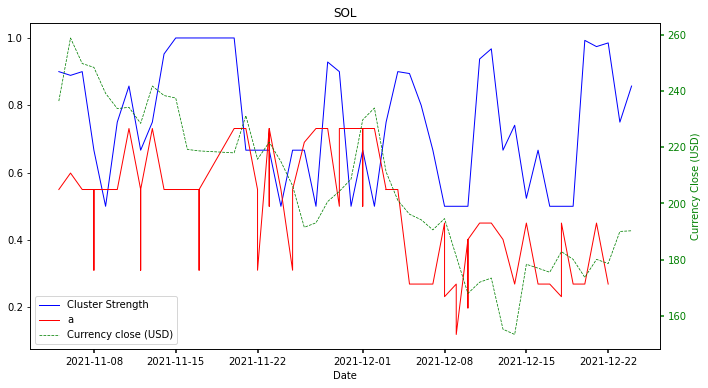

In [547]:
model_SOL = model(adj_mat=adj_mat_SOL, df_ta=df_ta_SOL, news_df=news_df_SOL, query='SOL')

C:\Users\jgier\AppData\Local\Temp/ipykernel_17380/2132487105.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netg['src'] = netg.index
C:\Users\jgier\AppData\Local\Temp/ipykernel_17380/2132487105.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netg['index'] = netg.index
C:\Users\jgier\AppData\Local\Temp/ipykernel_17380/3407296845.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

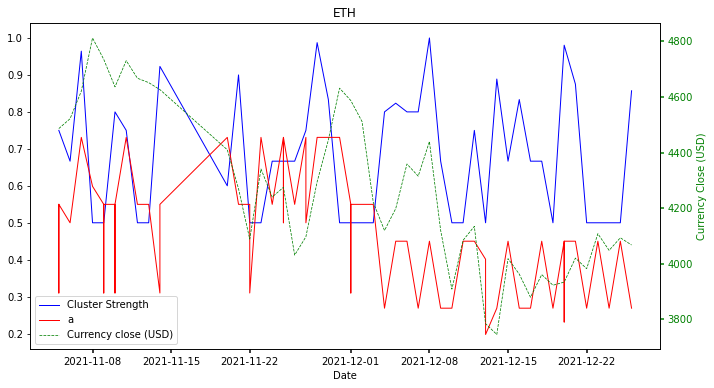

In [545]:
model_ETH = model(adj_mat=adj_mat_ETH, df_ta=df_ta_ETH, news_df=news_df_ETH, query='ETH')

C:\Users\jgier\AppData\Local\Temp/ipykernel_17380/2132487105.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netg['src'] = netg.index
C:\Users\jgier\AppData\Local\Temp/ipykernel_17380/2132487105.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netg['index'] = netg.index
C:\Users\jgier\AppData\Local\Temp/ipykernel_17380/3407296845.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

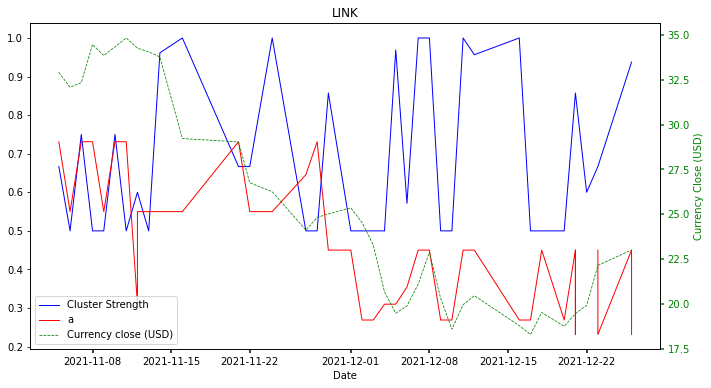

In [548]:
model_LINK = model(adj_mat=adj_mat_LINK, df_ta=df_ta_LINK, news_df=news_df_LINK, query='LINK')

C:\Users\jgier\AppData\Local\Temp/ipykernel_17380/2132487105.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netg['src'] = netg.index
C:\Users\jgier\AppData\Local\Temp/ipykernel_17380/2132487105.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netg['index'] = netg.index
C:\Users\jgier\AppData\Local\Temp/ipykernel_17380/3407296845.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

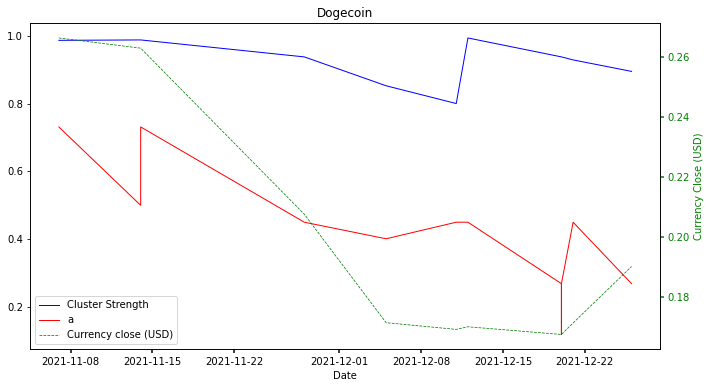

In [549]:
model_DOGE = model(adj_mat=adj_mat_DOGE, df_ta=df_ta_DOGE, news_df=news_df_DOGE, query='Dogecoin')

C:\Users\jgier\AppData\Local\Temp/ipykernel_2412/3520623250.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adj_mat['cluster_strength'] = adj_mat['neighbours_cluster'] / adj_mat['neighbours']
C:\Users\jgier\AppData\Local\Temp/ipykernel_2412/3520623250.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adj_mat['date'] = pd.to_datetime(adj_mat['date'])
C:\Users\jgier\AppData\Local\Temp/ipykernel_2412/1559817952.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

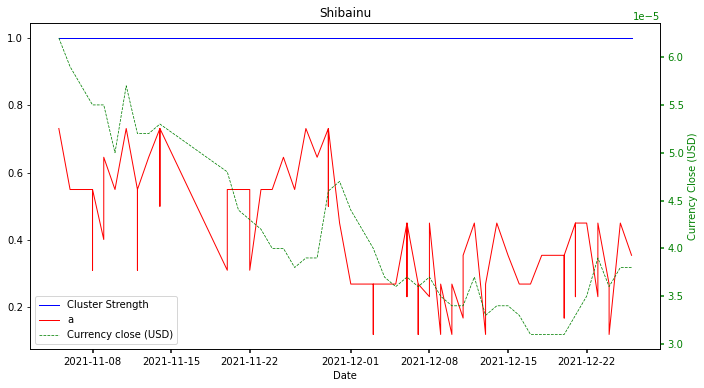

In [49]:
model_SHIB = model(adj_mat=adj_mat_SHIB, df_ta=df_ta_SHIB, news_df=news_df_SHIB, query='Shibainu')